# Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
# batchsize
bs = 64

# Loading the Data

In [12]:
doc(get_transforms)

get_transforms [source] [test] get_transforms ( do_flip : bool = True , flip_vert : bool = False , max_rotate : float = 10.0 , max_zoom : float = 1.1 , max_lighting : float = 0.2 , max_warp : float = 0.2 , p_affine : float = 0.75 , p_lighting : float = 0.75 , xtra_tfms : Optional [ Collection [ Transform ]]= None ) → Collection [ Transform ] 
 
 × Tests found for get_transforms : pytest -sv tests/test_vision_data.py::test_image_to_image_different_tfms [source] pytest -sv tests/test_vision_data.py::test_image_to_image_different_y_size [source] To run tests please refer to this guide . Utility func to easily create a list of flip, rotate, zoom , warp, lighting transforms. 
 Show in docs

In [4]:
img_path = Path("/home/ubuntu/data/CUB_200_2011/images/")
fnames = get_image_files(img_path, recurse=True)
pat = r'/([^/]+)_\d+_\d+.jpg$'

In [5]:
data = ImageDataBunch.from_name_re(
    img_path, fnames, pat, ds_tfms=get_transforms(), size=224
).normalize(imagenet_stats)

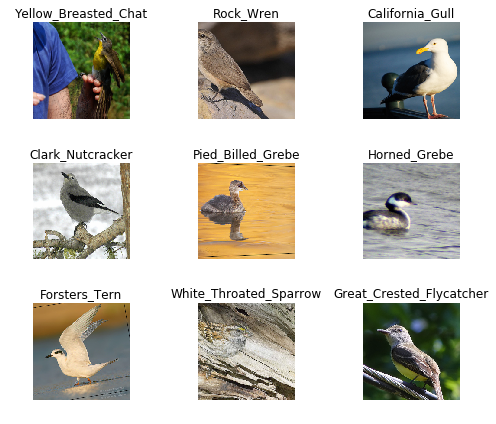

In [6]:
data.show_batch(rows=3, figsize=(7,6))

# Training the model

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [37]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.119607,2.025970,0.527790,01:29
1,2.150017,1.370631,0.372932,01:28
2,1.489641,1.122808,0.306322,01:28
3,1.180819,1.071802,0.296139,01:28


In [38]:
learn.save('stage-1')

# Results

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

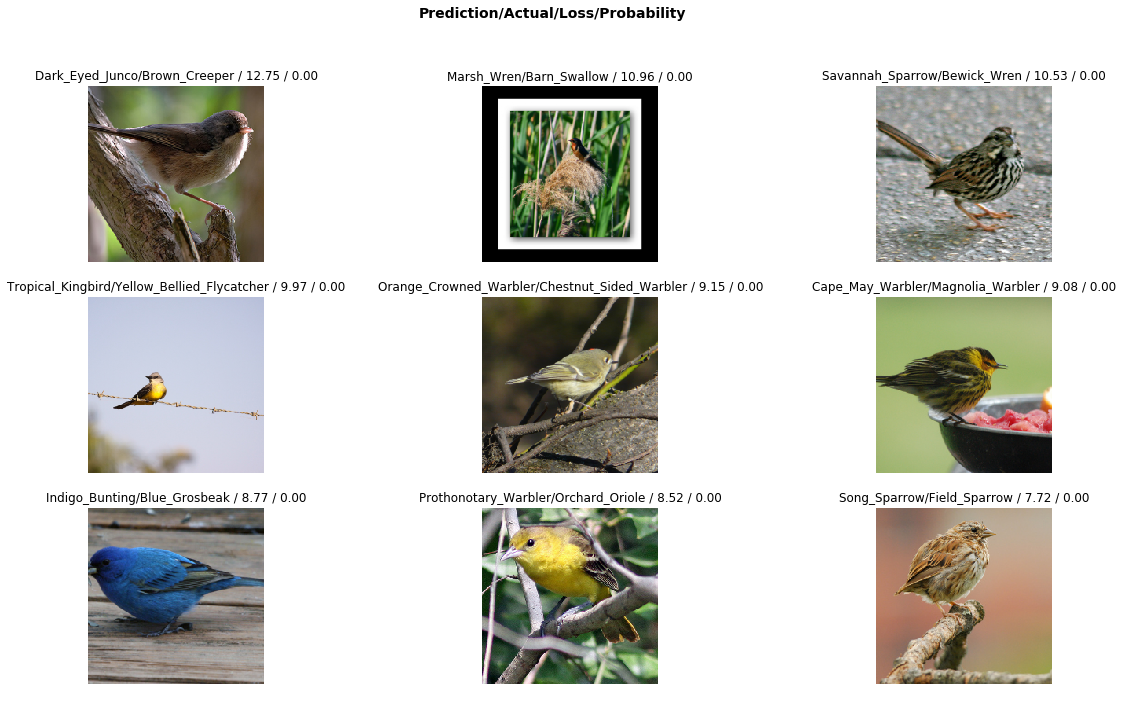

In [10]:
interp.plot_top_losses(9, figsize=(20,11))

In [11]:
interp.most_confused(min_val=2)

[('Least_Flycatcher', 'Western_Wood_Pewee', 6),
 ('California_Gull', 'Western_Gull', 5),
 ('American_Crow', 'Common_Raven', 4),
 ('Anna_Hummingbird', 'Ruby_Throated_Hummingbird', 4),
 ('Common_Tern', 'Forsters_Tern', 4),
 ('Great_Grey_Shrike', 'Loggerhead_Shrike', 4),
 ('Loggerhead_Shrike', 'Great_Grey_Shrike', 4),
 ('Bewick_Wren', 'Carolina_Wren', 3),
 ('Blue_Grosbeak', 'Indigo_Bunting', 3),
 ('Brandt_Cormorant', 'Pelagic_Cormorant', 3),
 ('Clay_Colored_Sparrow', 'Brewer_Sparrow', 3),
 ('Green_Kingfisher', 'Ringed_Kingfisher', 3),
 ('Mockingbird', 'Gray_Kingbird', 3),
 ('Slaty_Backed_Gull', 'California_Gull', 3),
 ('Tennessee_Warbler', 'Philadelphia_Vireo', 3),
 ('Yellow_Bellied_Flycatcher', 'Acadian_Flycatcher', 3),
 ('Baird_Sparrow', 'Grasshopper_Sparrow', 2),
 ('Bay_Breasted_Warbler', 'Pine_Warbler', 2),
 ('Black_Billed_Cuckoo', 'Yellow_Billed_Cuckoo', 2),
 ('Black_Capped_Vireo', 'Blue_Headed_Vireo', 2),
 ('Boat_Tailed_Grackle', 'Shiny_Cowbird', 2),
 ('Brewer_Blackbird', 'Gray_Catb

# Fine Tuning

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


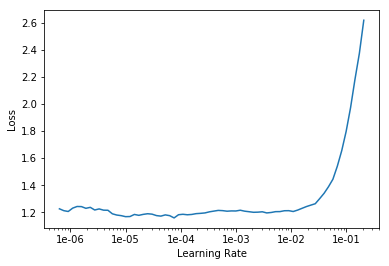

In [16]:
learn.recorder.plot()

In [17]:
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,2.383927,1.580191,0.408570,01:46
1,1.310687,0.926472,0.263471,01:46


In [8]:
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.197018,0.624330,0.170132,01:50
1,1.119167,0.664535,0.191769,01:47
2,0.892760,0.625837,0.183708,01:46
3,0.682209,0.599005,0.181162,01:47
4,0.601964,0.601249,0.176496,01:47


In [20]:
## Training: resnet50

In [6]:
data_50 = ImageDataBunch.from_name_re(img_path, fnames, pat, ds_tfms=get_transforms(),
                                   size=224, bs=16).normalize(imagenet_stats)

In [7]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [ ]:
learn.lr_find()
learn.recorder.plot()